In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [15]:
f_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels)= f_mnist.load_data()

In [16]:
train_images.shape

(60000, 28, 28)

In [17]:

train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [18]:
train_images=train_images/255.0
test_images=test_images/255.0


In [19]:
class_names=['t','trou','pull','dress','coat','sandal','shirt','sneak','bag','ankle_boot']

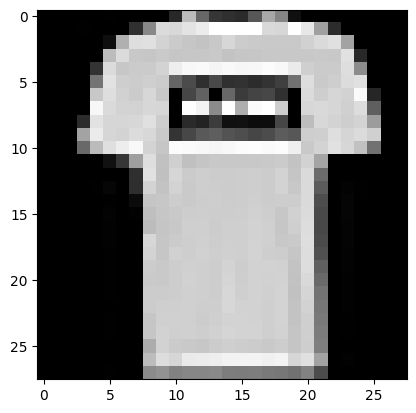

In [14]:
plt.figure()
plt.imshow(train_images[1], cmap='gray')
plt.show()

In [20]:
mod = tf.keras.models.Sequential()
mod.add(tf.keras.layers.Flatten(input_shape=(28,28)))
mod.add(tf.keras.layers.Dense(128, activation ='relu'))
mod.add(tf.keras.layers.Dense(10, activation='softmax'))



In [21]:
mod.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics='accuracy')
mod.fit(train_images,train_labels,epochs=3)
valLoss, valacc = mod.evaluate(test_images,test_labels)
print("accuracy",valacc)
mod.save('fcc model')

Epoch 1/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4951 - accuracy: 0.8257
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3738 - accuracy: 0.8651
Epoch 3/3
313/313 [==============================] - 1s 1ms/step - loss: 0.3991 - accuracy: 0.8558
accuracy 0.8557999730110168


INFO:tensorflow:Assets written to: fcc model\assets


INFO:tensorflow:Assets written to: fcc model\assets


In [25]:
def load_image(filename):
 # load the image
 img = load_img(filename, grayscale=True, target_size=(28, 28))
 # convert to array
 img = img_to_array(img)
 # reshape into a single sample with 1 channel
 img = img.reshape(1, 28, 28, 1)
 # prepare pixel data
 img = img.astype('float32')
 img = img / 255.0
 return img


1/1 [==============================] - 0s 28ms/step
pull


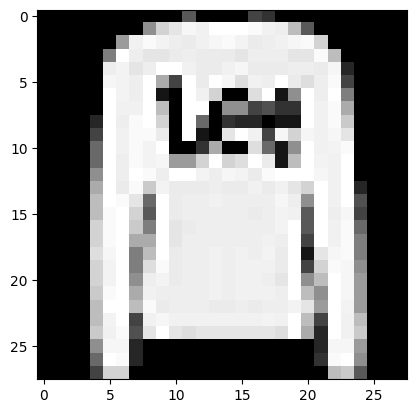

In [37]:

#from tensorflow.keras.utils import load_img
#from tensorflow.keras.utils import img_to_array
#from tensorflow.keras.models import load_model
img = load_image('sample_image.png')

#mod = load_model('fcc model')
result = mod.predict(img)
classx = np.argmax(result,axis=1)
classx = int(classx)
print(class_names[classx])
img = img.reshape(28,28)
plt.figure()
plt.imshow(img,cmap='gray')
plt.show()
